# 学習結果の描画

score は学習の際に用いた値  
fitness は一定区間毎にモデルの当てはまりをテストした値

In [1]:
!python3 -m pip install seaborn

In [2]:
import os
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pwd

/Users/work/work-worldmodel2023/WorldModel2023/otk/AgileRL-MATD3/simple_tag_v3


In [4]:
# 保存済みの population を読み込み
path_pop = "./result/20240102-0837/pickle-population.pkl"

population = dill.load(open(path_pop,'rb'))

In [5]:
# population のなかに含まれる fitness を取り出す
fitnesses = [agent.fitness for agent in population]

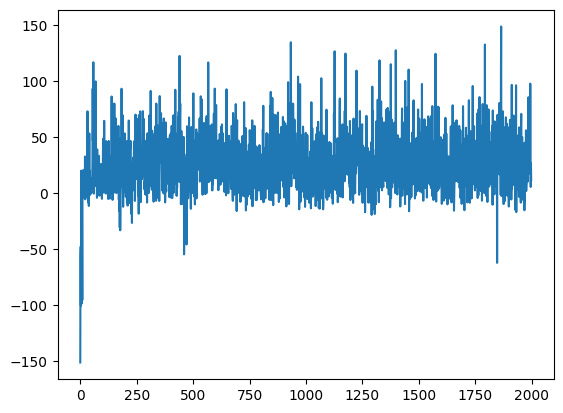

In [6]:
# fitnessを描画
plt.plot(fitnesses[0][0:-1])

In [7]:
print(fitnesses[0][0:20])

[-151.31595724436795, -55.41996271801986, -47.751226960322185, -100.61235784819183, 20.0, -12.464875082377029, -98.80164711983609, 13.321704563986694, -39.00543127732985, -95.66662707578678, 19.579963985312393, -4.197419073548253, 0.4851245759930496, -0.6964269473815025, 20.72377122834618, 5.620047213183594, 2.6008738758830483, 11.609645548172864, 11.289770273144072, -3.8292053528797694]


In [8]:
# Scoreを取り出す
scores = [agent.scores for agent in population]

print(scores[0][0:20])

[60.0, -23.97150081581745, -29.459089057060623, 59.37443687137873, -2.2001175492279392, 40.0, 0.0, -22.0457587000862, 0.0, -22.96311919370575, -20.42666048529883, -4.389615150057411, -1.5729677769006385, 60.0, -21.84525557592412, 0.0, -12.752967872766378, 0.0, 0.0, 0.0]


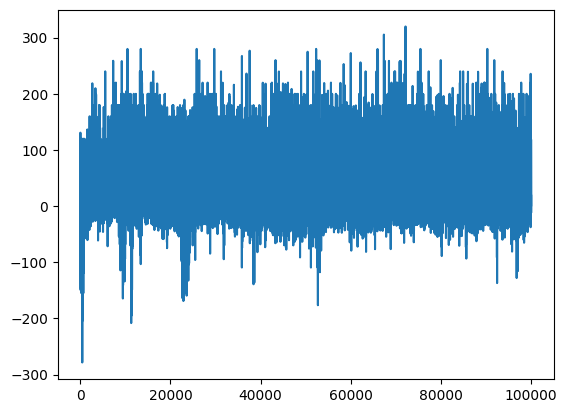

In [9]:
# Scoreを描画
plt.plot(scores[0][0:-1])

<Axes: >

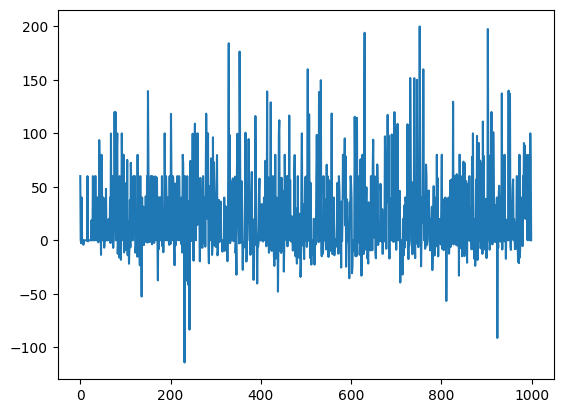

In [10]:
sns.lineplot(scores[0][0:-1:100], errorbar=('ci', 95))

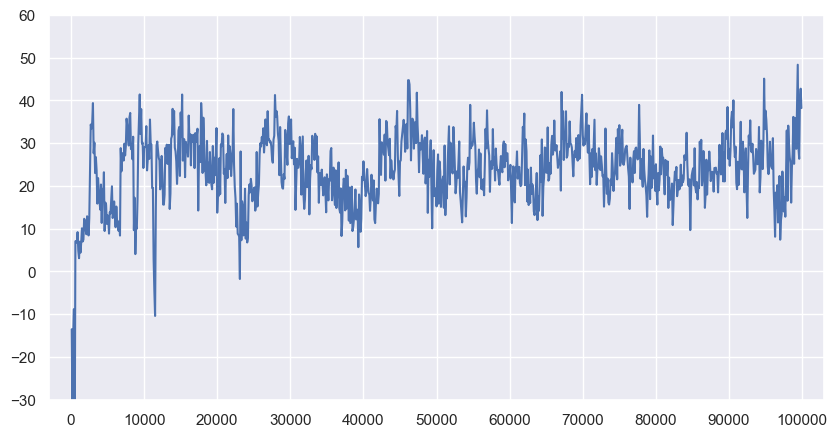

In [16]:
score = pd.DataFrame(scores[0][0:-1])
sns.set(rc={"figure.figsize": (10, 5)})

sns.lineplot(score.rolling(100, step=100).mean(), errorbar=('ci', 95), legend=False)

plt.xticks(np.arange(0, 103000, step=10000))
plt.xlim(-3000,103000)
plt.ylim(-30,60)

plt.savefig("score_simple_tag_v3.png")
plt.show()

In [12]:
score[1:101].mean()

0   -13.509708
dtype: float64